In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### 1) Получите данные и загрузите их в рабочую среду

In [9]:
data = pd.read_csv('https://raw.githubusercontent.com/RedNetMaker/LearnML/refs/heads/main/adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### 2) Проведите первичный анализ

#### a) Проверьте данные на пропуски

In [115]:
data.isna().sum() # Смотрим сумму пропусков

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Очищаем данные от неизвестных значений

In [144]:
df = data.loc[data['workclass'] != '?']
df = df.loc[data['occupation'] != '?']
df = df.loc[data['native-country'] != '?']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


#### b) Постройте 1-2 графика на выбор

In [ ]:

df_more = df[df['income'] == '>50K']
df_less = df[df['income'] == '<=50K']

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48834,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
48836,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


<function matplotlib.pyplot.show(close=None, block=None)>

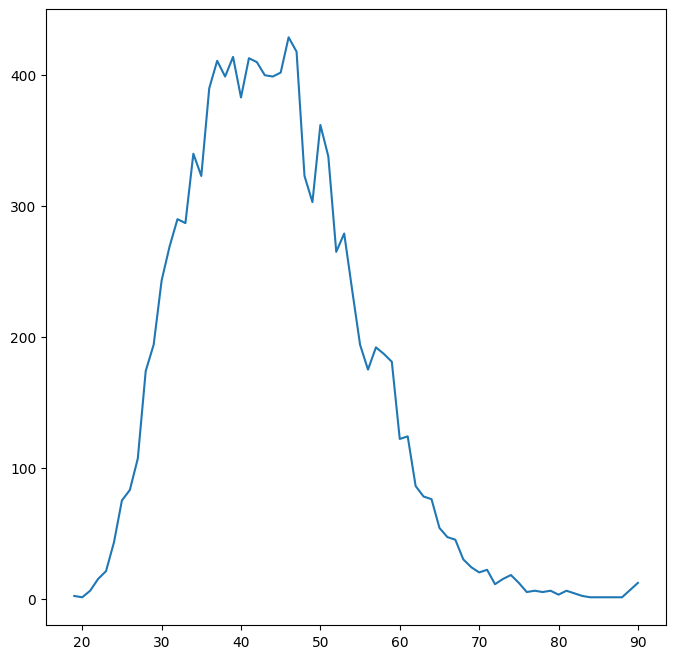

In [ ]:
grouped_age = df_more[['age', 'income']].groupby('age')
grouped_age = grouped_age.count()

plt.figure(figsize=(8,8))
plt.plot(grouped_age.index, grouped_age['income'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

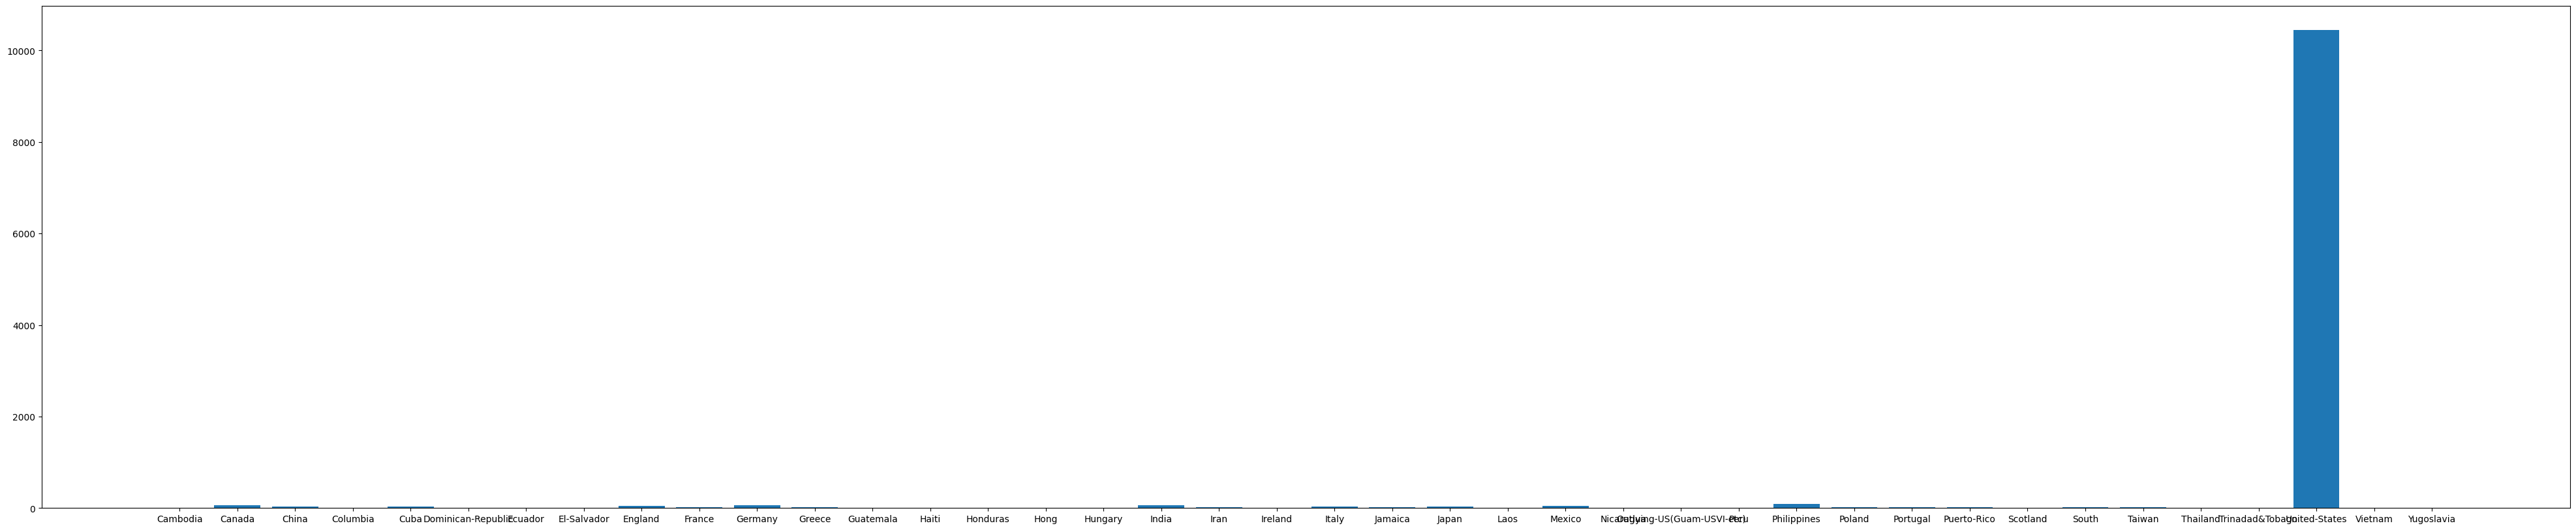

In [ ]:
grouped_country_more = df_more[['native-country', 'income']].groupby('native-country')
grouped_country_more = grouped_country_more.count()

plt.figure(figsize=(50,10))
plt.bar(grouped_country_more.index, grouped_country_more['income'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

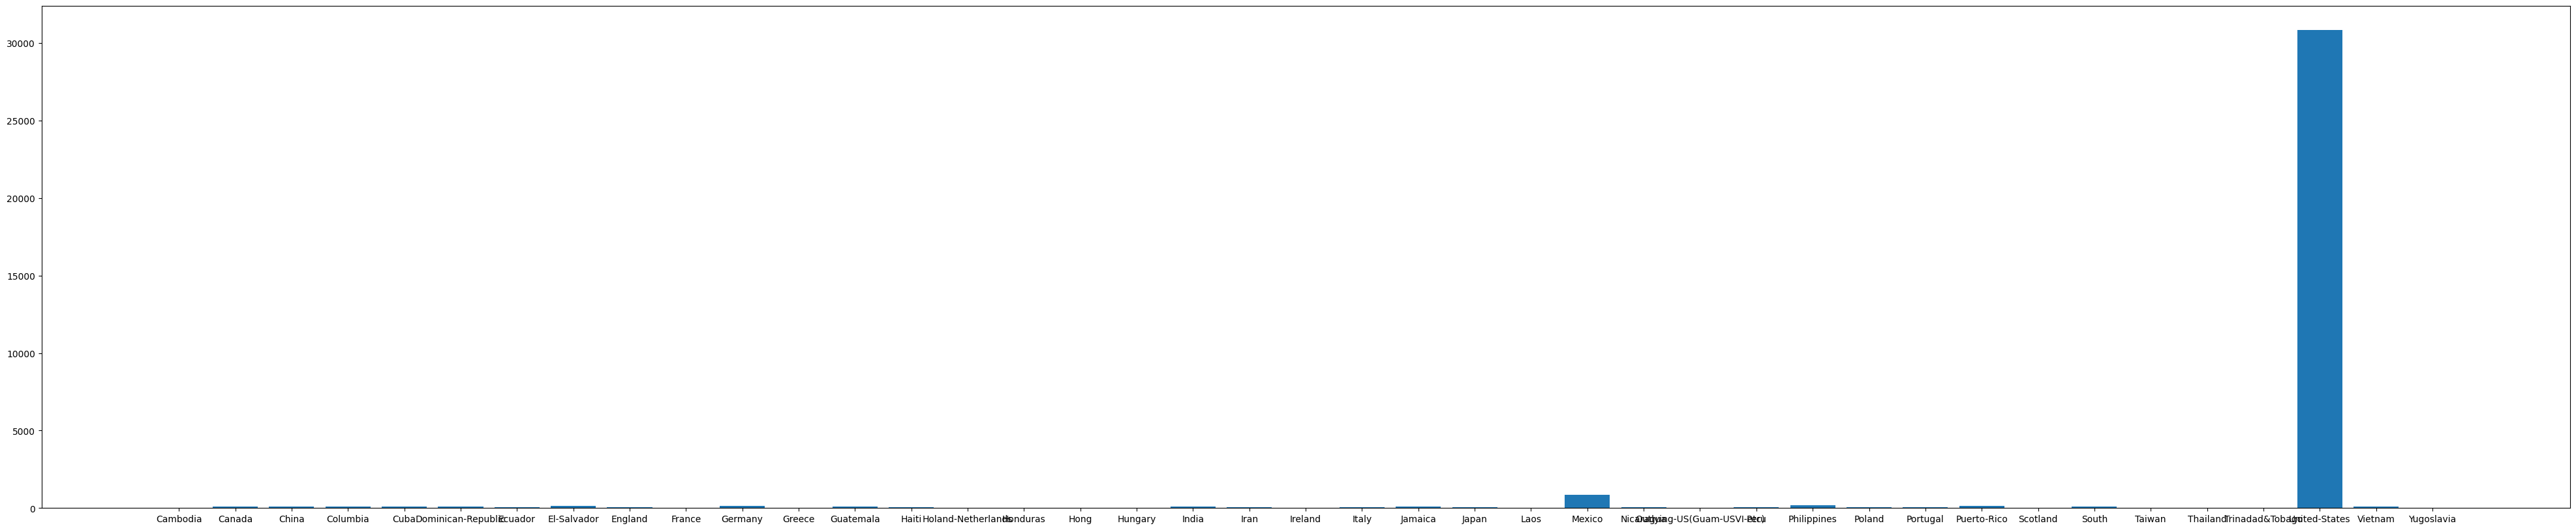

In [146]:
grouped_country_less = df_less[['native-country', 'income']].groupby('native-country')
grouped_country_less = grouped_country_less.count()

plt.figure(figsize=(50,10))
plt.bar(grouped_country_less.index, grouped_country_less['income'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

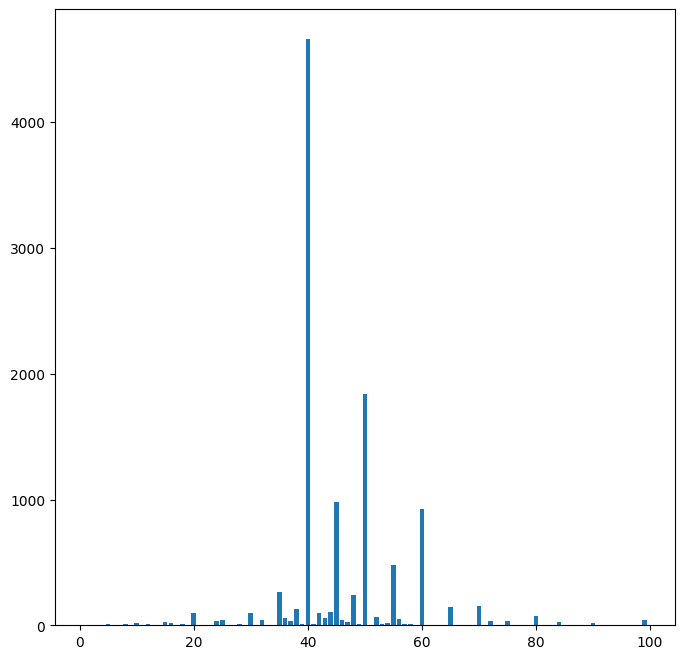

In [ ]:
grouped_mat_status = df_more[['hours-per-week', 'income']].groupby('hours-per-week')
grouped_mat_status = grouped_mat_status.count()

plt.figure(figsize=(8,8))
plt.bar(grouped_mat_status.index, grouped_mat_status['income'])
plt.show

#### c) Преобразуйте категориальные признаки

### 3) Разделите выборку на обучающее и тестовое подмножество

### 4) Обучите модели логистической регрессии и опорных векторов на обучающем множестве

### 5) Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей

### 6) Сформулируйте выводы по проделанной работе

#### a) Кратко опишите какие преобразования были сделаны с данными

#### b) Сравните точность двух моделей

#### c) Напишите свое мнение